In [1]:
%matplotlib inline
# inline was the only way my code would run. matplotlib notebook didn't work

# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#load file
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

#read the city and ride data. 
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

#merge datasets
city_ride_df = pd.merge(city_df, ride_df, how='outer', on='city')

#create dataframes for charts
df_avgfare = pd.DataFrame({'AvgFare':city_ride_df.groupby(["city", "driver_count", "type"]).fare.mean()}).reset_index("driver_count")
df_ridecount = pd.DataFrame({'RideCount':city_ride_df.groupby(["city","driver_count","type"]).ride_id.count()}).reset_index("city")

#merge Dataframes and create x & y axis for bubble plot
df_chart = pd.DataFrame.merge(df_avgfare, df_ridecount, on = ["city","driver_count","type"], how = 'inner').reset_index()

df_chart = df_chart.sort_values("type")
df_chart = df_chart.rename(columns={"type":"City Types"})
df_chart['sizes'] = df_chart.driver_count * 10
df_chart.head()

,City Types,city,driver_count,AvgFare,RideCount,sizes
100,Rural,Taylorhaven,1,42.263333,6,10
57,Rural,Newtonview,1,36.745000,4,10
55,Rural,New Ryantown,2,43.278333,6,20
92,Rural,South Jennifer,7,35.264286,7,70
95,Rural,South Marychester,1,41.870000,8,10


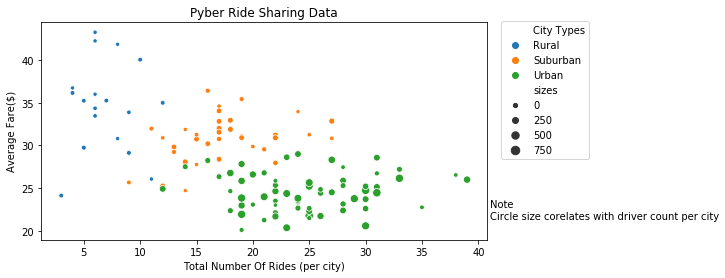

In [2]:
# bubble plot
plt.figure(figsize=(8,4))
plt.subplots_adjust(hspace=0.1)

g=sns.scatterplot(x='RideCount', y='AvgFare', hue='City Types', size = 'sizes', data=df_chart, legend = 'brief')

#labels and titles
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number Of Rides (per city)')
plt.title('Pyber Ride Sharing Data')
g.text(41,20,"Note\nCircle size corelates with driver count per city\n")
g.legend(loc='upper right', bbox_to_anchor = (1.24,1.03))
plt.axis(asect='image')
plt.savefig("../Images/Ride_Bubble.png", dpu=150, bbox_inches= 'tight')
plt.show()

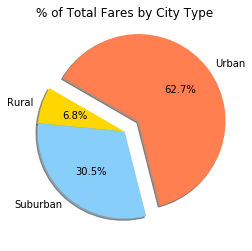

In [18]:
# Total Fares by City Type

#create pie chart 

TotalFare = sum(city_ride_df.fare)
df_fp = pd.DataFrame({'fp':city_ride_df.groupby(["type"]).fare.sum()})/TotalFare * 100
df_fp = df_fp.round(1).reset_index()
df_fp = pd.DataFrame(df_fp)
df_fp.set_index('type')
labelsp = df_fp.type
plt.title("% of Total Fares by City Type")
explode = (0, 0, 0.2)
colors = ['gold','lightskyblue', 'coral']

plt.pie(df_fp.fp,labels = labelsp,explode=explode, startangle=150, autopct="%1.1f%%", shadow=True, colors= colors)

plt.savefig("../Images/Ride_Pie_Fare.png",dpi=150)
plt.show()

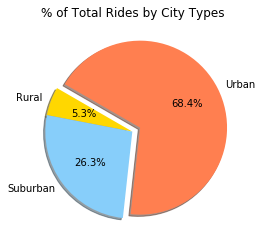

In [11]:
#Total Rides by City Type

# create pie chart
TotalRide = sum(df_chart.RideCount)
df_rp = pd.DataFrame({'rp':df_chart.groupby(["City Types"]).RideCount.sum()})/TotalRide * 100
df_rp = df_rp.round(1).reset_index()
df_rp.set_index('City Types')
plt.title("% of Total Rides by City Types")
explode = (0, 0 , 0.1)
colors = ['gold', 'lightskyblue', 'coral']

plt.pie(df_rp.rp,labels = labelsp, explode=explode, startangle=150, autopct="%1.1f%%", shadow=True, colors = colors)

plt.savefig("../Images/Ride_Pie_Ride.png",dpi=150)
plt.show()


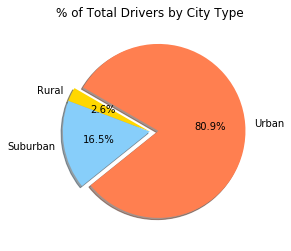

In [10]:
#Total Drivers by City Type

#create pie chart
TotalDrivers = sum(df_chart.driver_count)
df_dc = pd.DataFrame({'dc':df_chart.groupby(["City Types"]).driver_count.sum()})/TotalDrivers * 100
df_dc = df_dc.round(1).reset_index()
df_dc = pd.DataFrame(df_dc)
df_dc.set_index('City Types')
plt.title("% of Total Drivers by City Type")
explode = (0 ,0, 0.1)
colors = ['gold', 'lightskyblue','coral']

plt.pie(df_dc.dc,labels = labelsp,explode=explode, startangle=150, autopct="%1.1f%%", shadow=True, colors = colors)
plt.savefig("../Images/Rides_CityTypes.png",dpi=150)
plt.show()